First we install all requirements and clone the model that is hosted on my github [repository](https://https://github.com/NotAdvisable/audio_transfer).

In [2]:
!apt-get install -y libav-tools libasound2-dev libsndfile1-dev libjack-dev
!git clone https://github.com/NotAdvisable/audio_transfer.git audio_transfer

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate
Cloning into 'audio_transfer'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 251 (delta 23), reused 24 (delta 9), pack-reused 199
Receiving objects: 100% (251/251), 6.39 MiB | 3.48 MiB/s, done.
Resolving deltas: 100% (120/120), done.


Import everything that we need.

In [0]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from librosa.display import specshow
from IPython.display import Audio
from audio_transfer import timedomain
import tensorflow

Define a function that lets you display audio as spectrograms through librosa.

In [0]:
def plot_spectrogram(audio, title = "", showBar = True):
  D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
  librosa.display.specshow(D, y_axis='log', x_axis='time')
  if showBar == True:
    plt.colorbar(format='%+2.0f dB')
  if title != "":
    plt.title(title)

Now we load a content clip, plot it, and make it playable. Either locally or through tensorflow.keras.utils.get_file() if  it is an online resource. I prepared some example files in the audio_transfer repository, though.

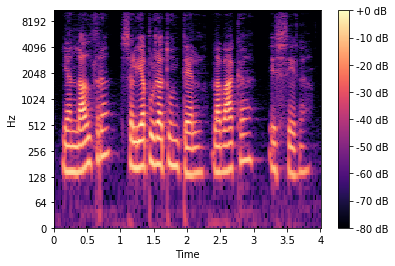

In [6]:
content = 'audio_transfer/assets/female_talking.wav'
contentAudio, sampleRate = librosa.core.load(content, sr=22050)
plot_spectrogram(contentAudio)
Audio(contentAudio, rate=sampleRate)

Next, we load a style clip.

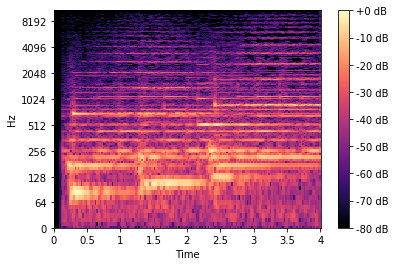

In [7]:
style = 'audio_transfer/assets/mozart.wav'
styleAudio, sampleRate = librosa.core.load(style, sr=22050)
plot_spectrogram(styleAudio)
Audio(styleAudio, rate=sampleRate)

Now we configure the model. It first computes the features of the given content and style files, and then applies to style to the content. The model tries to minimise content and style loss and saves the resulting style transfered file to a specified location.
<br>It'd strongly advise you to use the bfgs optimiser. The alternative adam optimiser just creates a noisy mess. Additionally, the alpha should stay small otherwise the content is going to interfere with the style transfer.

In [8]:
timedomain.run(content,
               style,
               'synthesis.wav',
               n_fft=4096,
               n_filters=4096,
               hop_length=512,
               alpha=0.001,
               n_layers=2,
               kernel_width=4,
               optimizer='bfgs'
              )

compute stylization  content loss:  Tensor("mul:0", shape=(), dtype=float32) style loss:  Tensor("mul_1:0", shape=(), dtype=float32)
compute stylization  layer:  0 content loss:  Tensor("add:0", shape=(), dtype=float32) style loss:  Tensor("add_1:0", shape=(), dtype=float32)
compute stylization  layer:  1 content loss:  Tensor("add_2:0", shape=(), dtype=float32) style loss:  Tensor("add_3:0", shape=(), dtype=float32)


W0713 00:41:24.174426 140402739492736 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0713 00:41:24.266309 140402739492736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Started optimization.
Done.


After the model has completed the transfer, we load the style transfered clip, plot it, and make it playable.

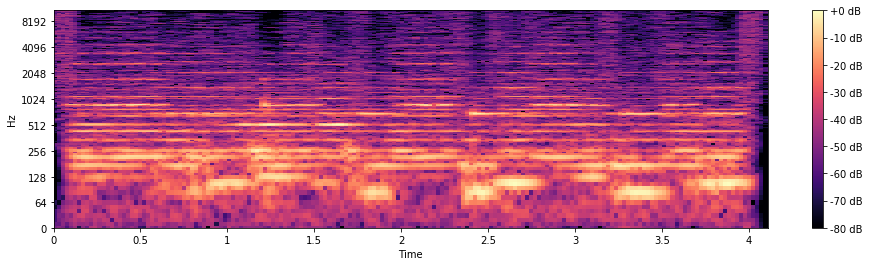

In [11]:
resultAudio, sampleRate = librosa.core.load('synthesis.wav', sr=22050)
plot_spectrogram(resultAudio)
Audio(resultAudio, rate=sampleRate)

Lastly, we can plot all the spectrograms next to each other to compare the style transfer more easily.

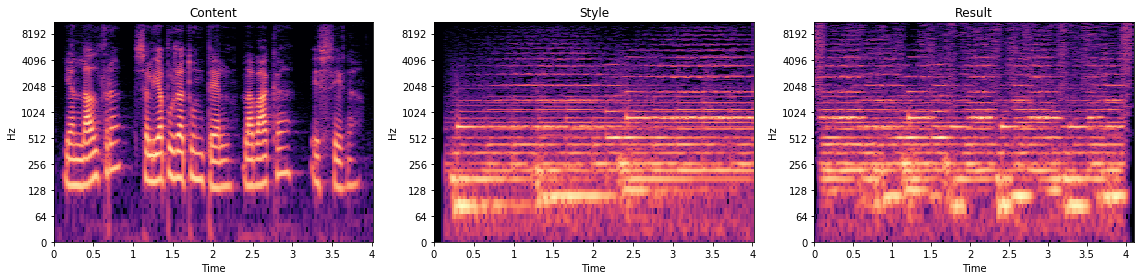

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 4

plt.subplot(1, 3, 1)
plot_spectrogram(contentAudio, title="Content", showBar=False)
plt.subplot(1, 3, 2)
plot_spectrogram(styleAudio, title="Style", showBar=False)
plt.subplot(1, 3, 3)
plot_spectrogram(resultAudio, title="Result", showBar=False)
plt.tight_layout()

fig_size[0] = 6
fig_size[1] = 4